# Durian Disease Classification

## Kaggle APIs

In [ ]:
!pip install kaggle

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


## Dowload Dataset

In [3]:
!kaggle competitions download -c durian-hackathon-durian-disease-classification

 96% 249M/258M [00:01<00:00, 132MB/s]
100% 258M/258M [00:01<00:00, 141MB/s]


In [ ]:
!unzip /content/durian-hackathon-durian-disease-classification.zip

## EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [6]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [7]:
train_df.head()

,id,label
0,55f5b8858ea1da67e15ae41074ba8021.jpg,1
1,7981041613d0135aaa3d619d33bd4804.jpg,3
2,76a2db1f6e39908a5f4659e9f8b69b96.jpg,3
3,cc72d01f926fc9ceb9471b19e7d324de.jpg,1
4,e03760313fdd85965159483927f8b700.jpg,1


In [8]:
test_df.head()

,id
0,f260abbeb311fc0630cf7f365f19ef48.jpg
1,02c6c43e2120f3967a312ec990709c92.jpg
2,3b233766322341dd231fc71fb04af635.jpg
3,4572d62acdf7fa26c09d01a112217276.jpg
4,5b515cc3b92245f6e064fda797fc3b1e.jpg


In [9]:
train_df['label'].value_counts()

,count
label,
2,87
1,78
3,72
0,41


### Split Train / Test

In [10]:
import os
import shutil

In [11]:
!mkdir /content/train /content/test

In [12]:
def move_file(image_id , dst_folder):

    dst = f'{dst_folder}/{image_id}'
    src = f'/content/Images/{image_id}'

    if not os.path.exists(dst):
        shutil.move(src, dst)

    else:
        print(f"File {dst} already exists. Skipping.")

In [13]:
# Moving train images
for idx, row in train_df.iterrows():
    img_id = row['id']
    move_file(img_id, '/content/train')

# Moving test images
for idx, row in test_df.iterrows():
    img_id = row['id']
    move_file(img_id, '/content/test')


### Sample Images

In [14]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [15]:
def get_random_files(folder_path, num_files):

    files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]

    return random.sample(files, min(num_files, len(files)))

In [16]:
def get_random_images(folder_path , annotation_path , num_images = 9):

    annotations = pd.read_csv(annotation_path , index_col = 'id')
    selected_images = get_random_files(folder_path = folder_path , num_files = num_images)

    return selected_images , {img : annotations.loc[img]['label'] for img in selected_images}

In [17]:
get_random_files('/content/train' , 9)

['2306b3e680b5768ce80f5348de6ab780.jpg',
 'db57713de5e7ab37082a6ea334f4e5f7.jpg',
 '234fee1867ba9f5724a24fb8f2b6d777.jpg',
 '58a034db8b5d81b1c7d3013529d2e4c4.jpg',
 '379ecc8ce885dd2eeff8aa6ad8f40570.jpg',
 'f133c73a00ebde20d3376a3e3e85e54a.jpg',
 '0f988a9a4e98f96428045c865fd7eda0.jpg',
 '3fbc663d4d3441eda1e61d0175ad3bcf.jpg',
 '8b2aa29d044b4f0b9a7cd420cea985e6.jpg']

In [18]:
get_random_images('/content/train' , '/content/train.csv' , 9)

(['6e89f242b45c9c63fff32fbdf670aa0c.jpg',
  '08a54d8177885192b25f8c1f00ac3ccd.jpg',
  '9b59596de5c0783e35c681e04784efa3.jpg',
  '3b33a6007dc9bcd3e7ccd7b61a7d4bfe.jpg',
  'e94070c6c6149a8654b55112fb89beda.jpg',
  '3b725e89c54a929e778e07b0e165af66.jpg',
  'ad41d57f86619c1ab1c6b64687508839.jpg',
  '103828760d7aad297ed232a577fd8e26.jpg',
  'a86735788204ddb97a7eaded148e1824.jpg'],
 {'6e89f242b45c9c63fff32fbdf670aa0c.jpg': 1,
  '08a54d8177885192b25f8c1f00ac3ccd.jpg': 3,
  '9b59596de5c0783e35c681e04784efa3.jpg': 1,
  '3b33a6007dc9bcd3e7ccd7b61a7d4bfe.jpg': 3,
  'e94070c6c6149a8654b55112fb89beda.jpg': 1,
  '3b725e89c54a929e778e07b0e165af66.jpg': 3,
  'ad41d57f86619c1ab1c6b64687508839.jpg': 3,
  '103828760d7aad297ed232a577fd8e26.jpg': 0,
  'a86735788204ddb97a7eaded148e1824.jpg': 0})

In [19]:
def display_image_grid(image_paths, labels, folder_path, grid_size=(3, 3)):
    """Displays selected images and their labels in a 3x3 grid using Matplotlib."""
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 10))
    for i, ax in enumerate(axes.flatten()):
        if i < len(image_paths):
            img = Image.open(os.path.join(folder_path, image_paths[i]))
            ax.imshow(img)
            ax.set_title(labels[image_paths[i]], fontsize=8)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [20]:
def display_image_grid_test(image_paths , folder_path , grid_size=(3, 3)):
    """Displays selected images and their labels in a 3x3 grid using Matplotlib."""
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 10))
    for i, ax in enumerate(axes.flatten()):
        if i < len(image_paths):
            img = Image.open(os.path.join(folder_path, image_paths[i]))
            ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

### Sample Train Images

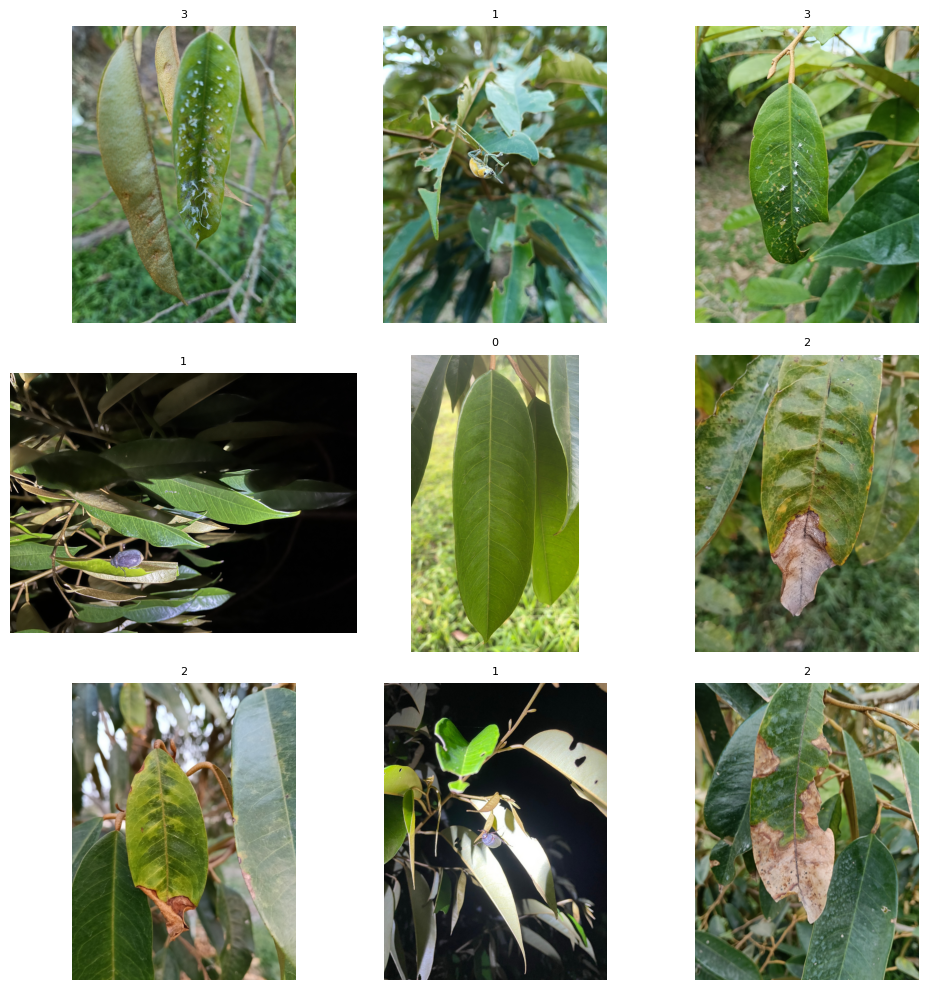

In [21]:
# Set folder path where images are stored and the annotation file
folder_path = "/content/train"  # Change this to your image directory
annotation_file = "/content/train.csv"  # Change this to your annotation JSON file

# Get random images and display them
random_images, image_labels = get_random_images(folder_path, annotation_file)
display_image_grid(random_images, image_labels, folder_path)

### Sample Test Images

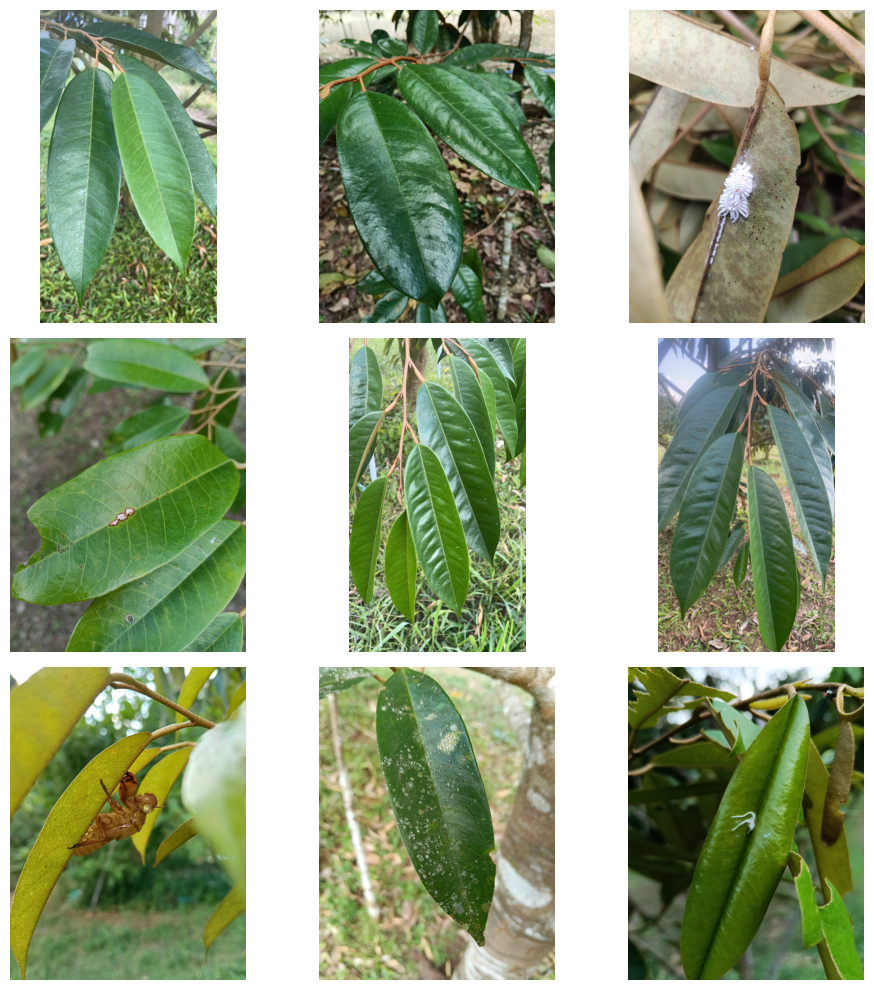

In [22]:
# Set folder path where images are stored and the annotation file
folder_path = "/content/test"  # Change this to your image directory

# Get random images and display them
random_images = get_random_files(folder_path , 9)
display_image_grid_test(random_images , folder_path)

## Augment Image

In [23]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import pandas as pd
import os
from tqdm import tqdm  # Import tqdm for progress tracking

# Paths
images_folder = "/content/train"
csv_file = "/content/train.csv"

# Load the annotation file
df = pd.read_csv(csv_file)

# Define Augmentation Pipeline with Additional Augmentations
augmentations = [
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
    A.Rotate(limit=30, p=0.5),
    A.RandomGamma(p=0.5),
    A.CLAHE(clip_limit=2.0, p=0.3),
    A.CoarseDropout(max_holes=5, max_height=20, max_width=20, p=0.4),  # Simulate missing patches
    A.RandomRain(p=0.3),  # Simulate rain
    A.RandomShadow(p=0.3),  # Simulate lighting variations
    A.RandomFog(fog_coef_lower=0.1, fog_coef_upper=0.3, p=0.3),  # Add haze
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),  # Distort shape slightly
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=15, val_shift_limit=10, p=0.5),  # Adjust color tones
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.3),  # Enhance edges
]

transform = A.Compose(augmentations + [ToTensorV2()])

# Process each image
new_data = []
for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing Images"):
    image_id = row["id"]
    label = row["label"]  # Ensure the CSV has a "label" column

    image_path = os.path.join(images_folder, image_id)
    if not os.path.exists(image_path):
        continue  # Skip missing images

    # Load Image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Generate Augmented Images
    for i in range(3):  # Change number of augmentations per image
        augmented = transform(image=image)["image"]

        # Convert tensor to numpy
        augmented = augmented.permute(1, 2, 0).numpy()

        # New Filename
        new_filename = f"{os.path.splitext(image_id)[0]}_aug{i+1}.jpg"
        new_path = os.path.join(images_folder, new_filename)

        # Save Augmented Image
        cv2.imwrite(new_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

        # Append new entry
        new_data.append({"id": new_filename, "label": label})

# Append new data to CSV
df_extended = pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)

# Save updated CSV
df_extended.to_csv("/content/train.csv", index=False)

print(f"Data augmentation completed. Extended CSV saved with {len(df_extended)} entries.")


<ipython-input-23-29837e3e7968>:23: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=5, max_height=20, max_width=20, p=0.4),  # Simulate missing patches
<ipython-input-23-29837e3e7968>:26: UserWarning: Argument(s) 'fog_coef_lower, fog_coef_upper' are not valid for transform RandomFog
  A.RandomFog(fog_coef_lower=0.1, fog_coef_upper=0.3, p=0.3),  # Add haze
<ipython-input-23-29837e3e7968>:27: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.3),  # Distort shape slightly
Processing Images: 100%|██████████| 278/278 [02:20<00:00,  1.98it/s]

Data augmentation completed. Extended CSV saved with 1112 entries.


## Torch Lightning ⚡

### Install Pytorch Lightning

In [ ]:
!pip install pytorch-lightning

In [1]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import pytorch_lightning as pl

### Define Our Dataset

In [2]:
# Custom Dataset
class PlantDataset(Dataset):

    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.label_mapping = {label: idx for idx, label in enumerate(sorted(self.annotations['label'].unique()))}

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.annotations.iloc[idx]['id'])
        image = Image.open(img_name).convert("RGB")
        label = self.label_mapping[self.annotations.iloc[idx]['label']]

        if self.transform:
            image = self.transform(image)

        return image, label

In [3]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
# Load dataset
dataset = PlantDataset(csv_file="/content/train.csv", root_dir="/content/train", transform=transform)

# Split dataset into train and validation
train_size = int(1 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [5]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=8)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=8)

### Define Our Model

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
from torchvision import models

class PlantClassifier(pl.LightningModule):

    def __init__(self, num_classes):
        super().__init__()
        # Load MaxViT with pretrained weights
        self.model = models.maxvit_t(weights=models.MaxVit_T_Weights.DEFAULT)

        # Replace the classifier to match num_classes
        in_features = self.model.classifier[5].in_features  # Adjust according to the model architecture
        self.model.classifier[5] = nn.Linear(in_features, num_classes)

        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self.forward(images)
        loss = self.criterion(outputs, labels)
        acc = (outputs.argmax(dim=1) == labels).float().mean()

        self.log("train_loss", loss, prog_bar=True)
        self.log("train_acc", acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self.forward(images)
        loss = self.criterion(outputs, labels)
        acc = (outputs.argmax(dim=1) == labels).float().mean()

        self.log("val_loss", loss, prog_bar=True)
        self.log("val_acc", acc, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
        return [optimizer], [scheduler]


### Training

In [ ]:
# Train the model
num_classes = len(dataset.label_mapping)
model = PlantClassifier(num_classes)
trainer = pl.Trainer(max_epochs=300, accelerator = "gpu" if torch.cuda.is_available() else "cpu")
trainer.fit(model, train_loader, val_loader)

### Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Function to load model and display confusion matrix
def evaluate_model(model, test_loader, num_classes):

    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():

        for images, labels in test_loader:
            outputs = model(images)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds, labels=np.arange(num_classes))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(num_classes))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

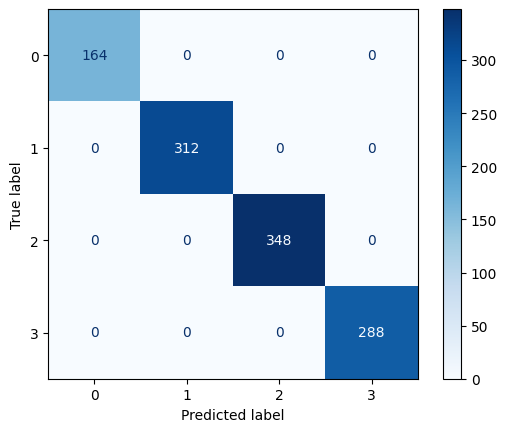

In [11]:
evaluate_model(model = model , test_loader = train_loader , num_classes = len(dataset.label_mapping)  )

In [12]:
from tqdm.notebook import tqdm

In [13]:
# Prediction function (Batch Inference with tqdm)
def predict_test_images(model, test_folder, output_csv, batch_size = 32):

    model.eval()
    test_images = [f for f in os.listdir(test_folder)]
    test_dataset = [os.path.join(test_folder, img) for img in test_images]

    test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False, num_workers = 8)
    predictions = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Predicting", unit="batch"):
            images = [Image.open(img).convert("RGB") for img in batch]
            images = torch.stack([transform(img) for img in images])
            outputs = model(images)
            predicted_labels = outputs.argmax(dim=1).tolist()

            for img_path, label in zip(batch, predicted_labels):
                predictions.append({"id": os.path.basename(img_path) , "predict": label})

    df = pd.DataFrame(predictions)
    df.to_csv(output_csv, index=False)
    print(f"Predictions saved to {output_csv}")

In [14]:
# Predict on test set and save results
test_folder = "/content/test"
output_csv = "/content/submission.csv"
predict_test_images(model, test_folder, output_csv)

Predicting:   0%|          | 0/9 [00:00<?, ?batch/s]

Predictions saved to /content/submission.csv


In [15]:
submission_df = pd.read_csv('/content/submission.csv' , index_col = 'id')

In [16]:
submission_df.loc['3b233766322341dd231fc71fb04af635.jpg']

,3b233766322341dd231fc71fb04af635.jpg
predict,1


In [17]:
submission_df.loc['f260abbeb311fc0630cf7f365f19ef48.jpg']['predict'] = 3

<ipython-input-17-67a910463a2b>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submission_df.loc['f260abbeb311fc0630cf7f365f19ef48.jpg']['predict'] = 3


In [18]:
submission_df.to_csv('/content/submission.csv')

In [19]:
!kaggle competitions submit -c durian-hackathon-durian-disease-classification -f /content/submission.csv -m "maxvit / Augment / 300 epochs"

100% 10.6k/10.6k [00:00<00:00, 29.8kB/s]
Successfully submitted to Durian Hackathon: Durian Disease Classification

In [21]:
!kaggle competitions submissions -c durian-hackathon-durian-disease-classification

fileName        date                 description                                    status    publicScore  privateScore  
--------------  -------------------  ---------------------------------------------  --------  -----------  ------------  
submission.csv  2025-02-17 15:21:46  maxvit / Augment / 300 epochs                  complete  0.84863      0.84095       
submission.csv  2025-02-16 06:45:19  maxvit / Augment                               complete  0.81482      0.85086       
miracle.csv     2025-02-16 06:11:50                                                 complete  0.82200      0.84469       
miracle.csv     2025-02-16 06:10:38                                                 error                                
submission.csv  2025-02-16 06:07:39  Resnet-152 / Augment                           complete  0.83809      0.81242       
submission.csv  2025-02-16 05:56:04  Resnet-152 / Augment                           complete  0.81073      0.78742       
submission.csv  2025-02-